In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/DSP-55/main/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [56]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [57]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [58]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

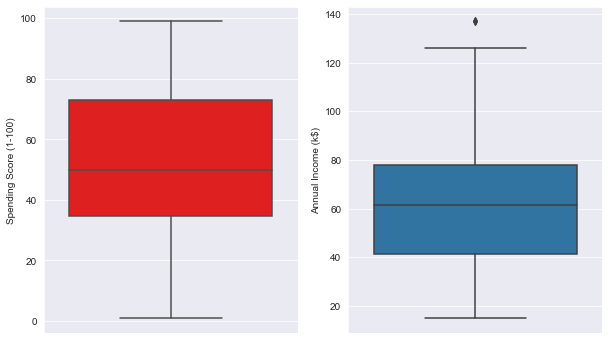

In [59]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Spending Score (1-100)'], color='red')

plt.subplot(1,2,2)
sns.boxplot(y = df['Annual Income (k$)'])
plt.show()

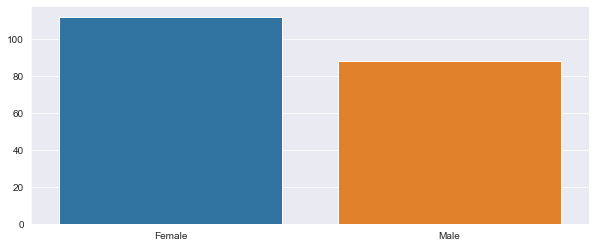

In [60]:
gnders = df.Gender.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.barplot(x = gnders.index, y = gnders.values)
plt.show()

Age Distribution

In [61]:
age_18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age_26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age_36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age_46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age_55_above = df.Age[df.Age >= 56]

In [62]:
[len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55_above.values)]

[38, 60, 36, 37, 29]

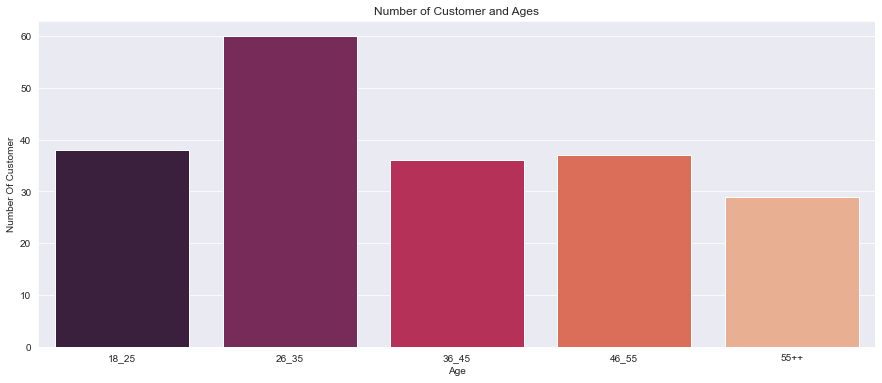

In [63]:
x = ['18_25','26_35','36_45','46_55','55++']
y = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55_above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = x, y = y, palette='rocket')

plt.title('Number of Customer and Ages')
plt.xlabel('Age')
plt.ylabel('Number Of Customer')
plt.show()

Spending score distribition

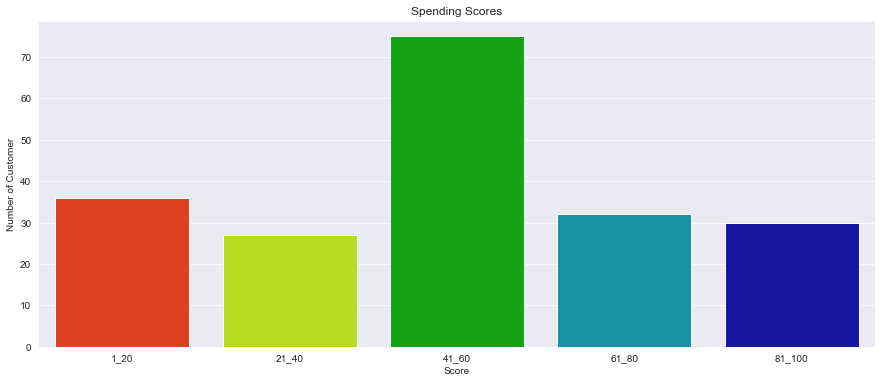

In [64]:
ss1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss1_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss1_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss1_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss1_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ss_x = ['1_20','21_40','41_60','61_80','81_100']
ss_y = [len(ss1_20.values), len(ss1_40.values), len(ss1_60.values), len(ss1_80.values), len(ss1_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = ss_x, y = ss_y, palette= 'nipy_spectral_r', )
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('Number of Customer')
plt.show()

Clustering

In [65]:
from sklearn.cluster import KMeans

k = 4

In [66]:
k_means = KMeans(n_clusters=4)
k_means.fit(df.iloc[:,1:])
print('Inertia : ',k_means.inertia_)

Inertia :  104366.151455562


k = 5

In [67]:
k_means = KMeans(n_clusters=5)
k_means.fit(df.iloc[:,1:])
print('Inertia : ',k_means.inertia_)

Inertia :  75350.77917248776


k = 3

In [68]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df.iloc[:,1:])
print('Inertia : ',k_means.inertia_)

Inertia :  143342.75157170597


k = 2

In [69]:
k_means = KMeans(n_clusters=2)
k_means.fit(df.iloc[:,1:])
print('Inertia : ',k_means.inertia_)

Inertia :  212840.16982097193


C:\Users\iUsaid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


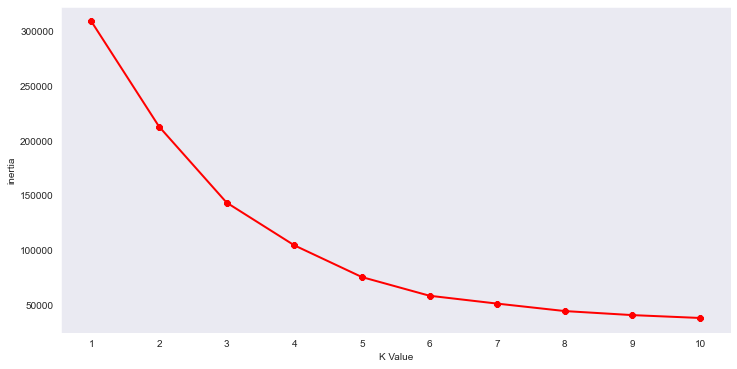

In [43]:
inertia = []

for k in range(1,11):
    k_means = KMeans(n_clusters= k)
    k_means.fit(df.iloc[:,1:])
    inertia.append(k_means.inertia_)
    
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), inertia, linewidth = 2, color = 'red', marker = '8') # Elbow plot
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('inertia')
plt.show()

Re Cluster

In [44]:
k_means = KMeans(n_clusters=3)
k_means.fit(df.iloc[:,1:])

KMeans(n_clusters=3)

In [45]:
k_means.predict(df.iloc[:,1:])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [46]:
df['Cluster'] = k_means.predict(df.iloc[:,1:])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,0
198,Male,32,137,18,2


In [48]:
df['clus'] = k_means.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,clus
0,Male,19,15,39,1,1
1,Male,21,15,81,1,1
2,Female,20,16,6,1,1
3,Female,23,16,77,1,1
4,Female,31,17,40,1,1
...,...,...,...,...,...,...
195,Female,35,120,79,0,0
196,Female,45,126,28,2,2
197,Male,32,126,74,0,0
198,Male,32,137,18,2,2


Profiling the cluster

In [49]:
df.Cluster.value_counts()

1    123
0     39
2     38
Name: Cluster, dtype: int64

In [50]:
df[df['Cluster'] == 0]

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,clus
123,Male,39,69,91,0,0
125,Female,31,70,77,0,0
127,Male,40,71,95,0,0
129,Male,38,71,75,0,0
131,Male,39,71,75,0,0
133,Female,31,72,71,0,0
135,Female,29,73,88,0,0
137,Male,32,73,73,0,0
139,Female,35,74,72,0,0
141,Male,32,75,93,0,0


In [51]:
df[df['Cluster'] == 0].describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster,clus
count,39.000000,39.000000,39.000000,39.0,39.0
mean,32.692308,86.538462,82.128205,0.0,0.0
std,3.728650,16.312485,9.364489,0.0,0.0
min,27.000000,69.000000,63.000000,0.0,0.0
25%,30.000000,75.500000,74.500000,0.0,0.0
50%,32.000000,79.000000,83.000000,0.0,0.0
75%,35.500000,95.000000,90.000000,0.0,0.0
max,40.000000,137.000000,97.000000,0.0,0.0


In [52]:
df[df['Cluster'] == 0].describe().loc[['mean']]

,Age,Annual Income (k$),Spending Score (1-100),Cluster,clus
mean,32.692308,86.538462,82.128205,0.0,0.0


In [53]:
df[df['Cluster'] == 1].describe().loc[['mean']]

,Age,Annual Income (k$),Spending Score (1-100),Cluster,clus
mean,40.325203,44.154472,49.829268,1.0,1.0


In [54]:
df[df['Cluster'] == 2].describe().loc[['mean']]

,Age,Annual Income (k$),Spending Score (1-100),Cluster,clus
mean,40.394737,87.0,18.631579,2.0,2.0
